In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def init_df(n):
    columns = ['fname', 'n', 't_opt','t','eval_opt','eval','popsize','maxgens','pxover','pmutation','krzyz_arytm','skal','elit','seed','y']
    for i in range(n):
        columns += ['x'+str(i)]
    #print(columns)
    return pd.DataFrame(columns=columns)
def proc_line(df, line, fname, n):
    s = line.split('|')
    s.pop()
    s = [float(x) for x in s]
    df.loc[df.shape[0]] = [fname, n] + s    
def load_file(filename, fname, n):
    with open(filename) as f:
        data = f.readlines()
        tdf = init_df(n)
        for line in data: proc_line(tdf,line, fname, n) 
    return tdf

In [3]:
filename = "./CW 9 - EA_OPT/results/ackley/report_EA_auto_1.txt"
df = None
for fname in ['ackley','dejong','rastragin']:
    for n in [1, 5, 10]:
        filename = f"./CW 9 - EA_OPT/results/{fname}/report_EA_auto_{n}.txt"
        tdf = load_file(filename, fname, n)
        if (type(df) == type(None)):
            df = tdf
        else:
            df = pd.concat([df, tdf])
df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]
dflt = df.head(1)

In [4]:
df.head(5)

,fname,n,t_opt,t,eval_opt,eval,popsize,maxgens,pxover,pmutation,...,x1,x2,x3,x4,x5,x6,x7,x8,x9,g
0,ackley,1,0.022,1.288,17600.0,1000050.0,50.0,20000.0,0.5,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1
1,ackley,1,0.639,1.256,507550.0,1000050.0,50.0,20000.0,0.5,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1
2,ackley,1,0.116,1.303,88350.0,1000050.0,50.0,20000.0,0.5,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1
3,ackley,1,0.169,0.971,65180.0,400020.0,20.0,20000.0,0.5,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1
4,ackley,1,0.580,0.965,234700.0,400020.0,20.0,20000.0,0.5,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ackley1


In [ ]:
gb = df.groupby(by='g')

In [5]:
def plot_1(df, param, y='y', path="./plots/", ext='png', show=True):
    fig, axs = plt.subplots(3, 3, figsize=(15,12))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    paramdf = df[df[param]!=dflt[param].values[0]]
    dfltdf = df.loc[[0,1,2]]
    axn = -1
    for fname in ['ackley','dejong','rastragin']:
        tdf = paramdf[paramdf['fname']==fname]
        for g in sorted(np.unique(tdf['g']), key=len):
            axn += 1
            for seed in [0,10,100]:
                axid = int(axn/3)
                axid2 = axn%3
                tdf2 = tdf[(tdf['g'] == g) & (tdf['seed']==seed)]
                dfltdf2 = dfltdf[(dfltdf['g'] == g) & (dfltdf['seed']==seed)]
                tdf2 = pd.concat([tdf2, dfltdf2]).sort_values(by=param)
                ax = axs[axid, axid2]
                ax.scatter(tdf2[param], tdf2[y])
                ax.plot(tdf2[param], tdf2[y], label = ' seed: ' + str(seed), alpha = 0.8)
                ax.title.set_text(f"{fname.capitalize()} n = {tdf2['n'].values[0]}")
                ax.legend()
                ax.set_xlabel(param)
                ax.set_ylabel(y)
                ax.set_xticks(tdf2[param])
                if param=='maxgens':
                    ax.set_xticklabels(ax.get_xticklabels(), rotation = 15)

    fig.suptitle(f"Parametr {param}", y = 0.95, fontsize=25)
    fig.savefig(path + f'{param}.{ext}', bbox_inches='tight')
    if (show):
        plt.show()
    else: 
        return 0

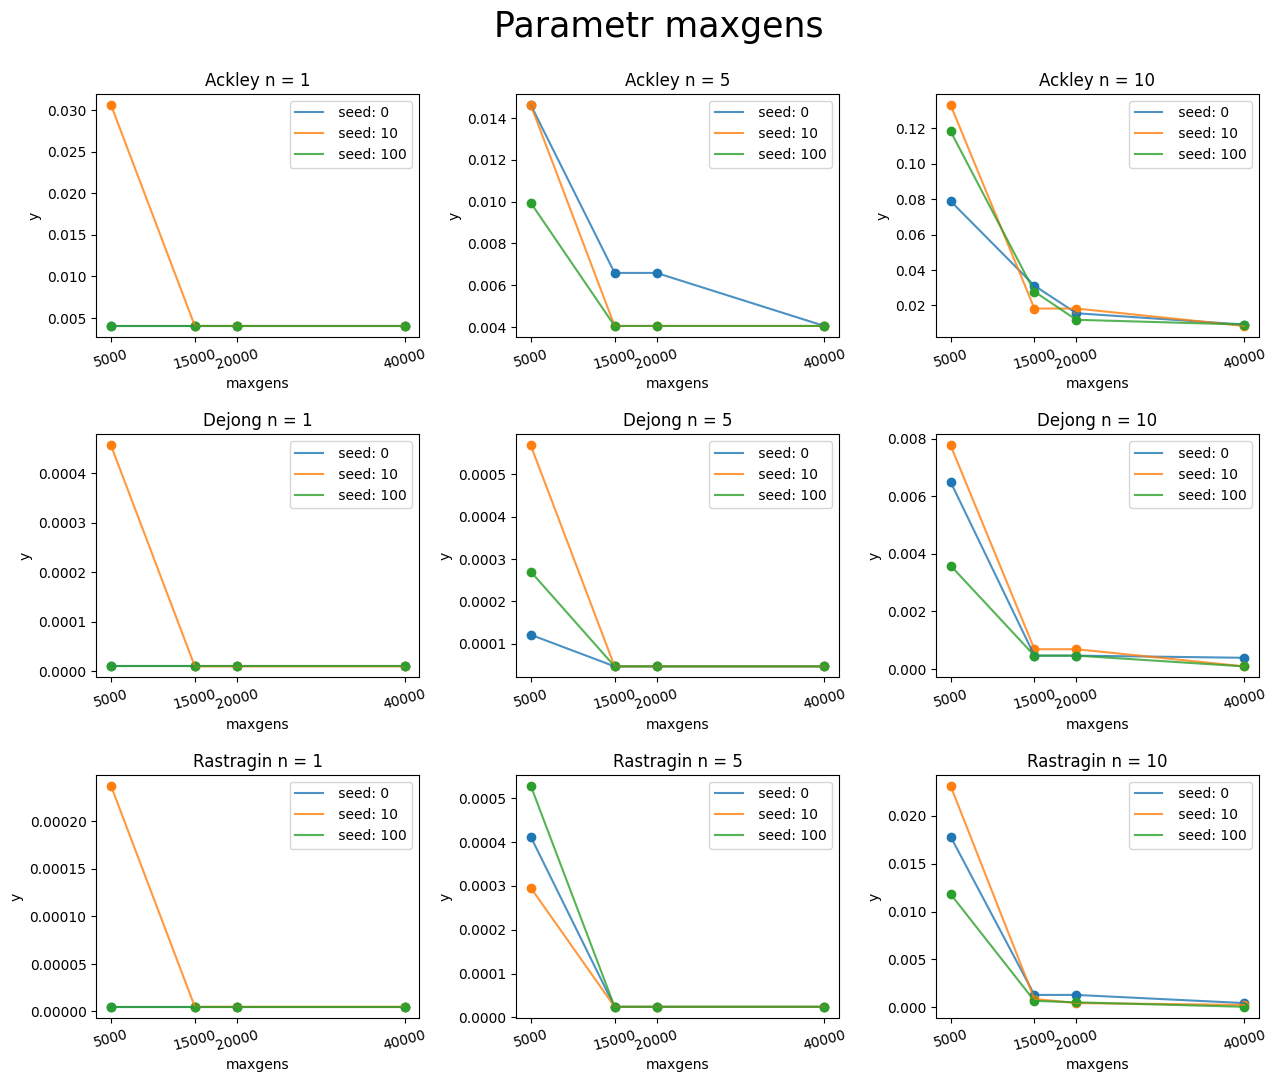

In [6]:
param = 'maxgens'
plot_1(df,param, y = 'y')

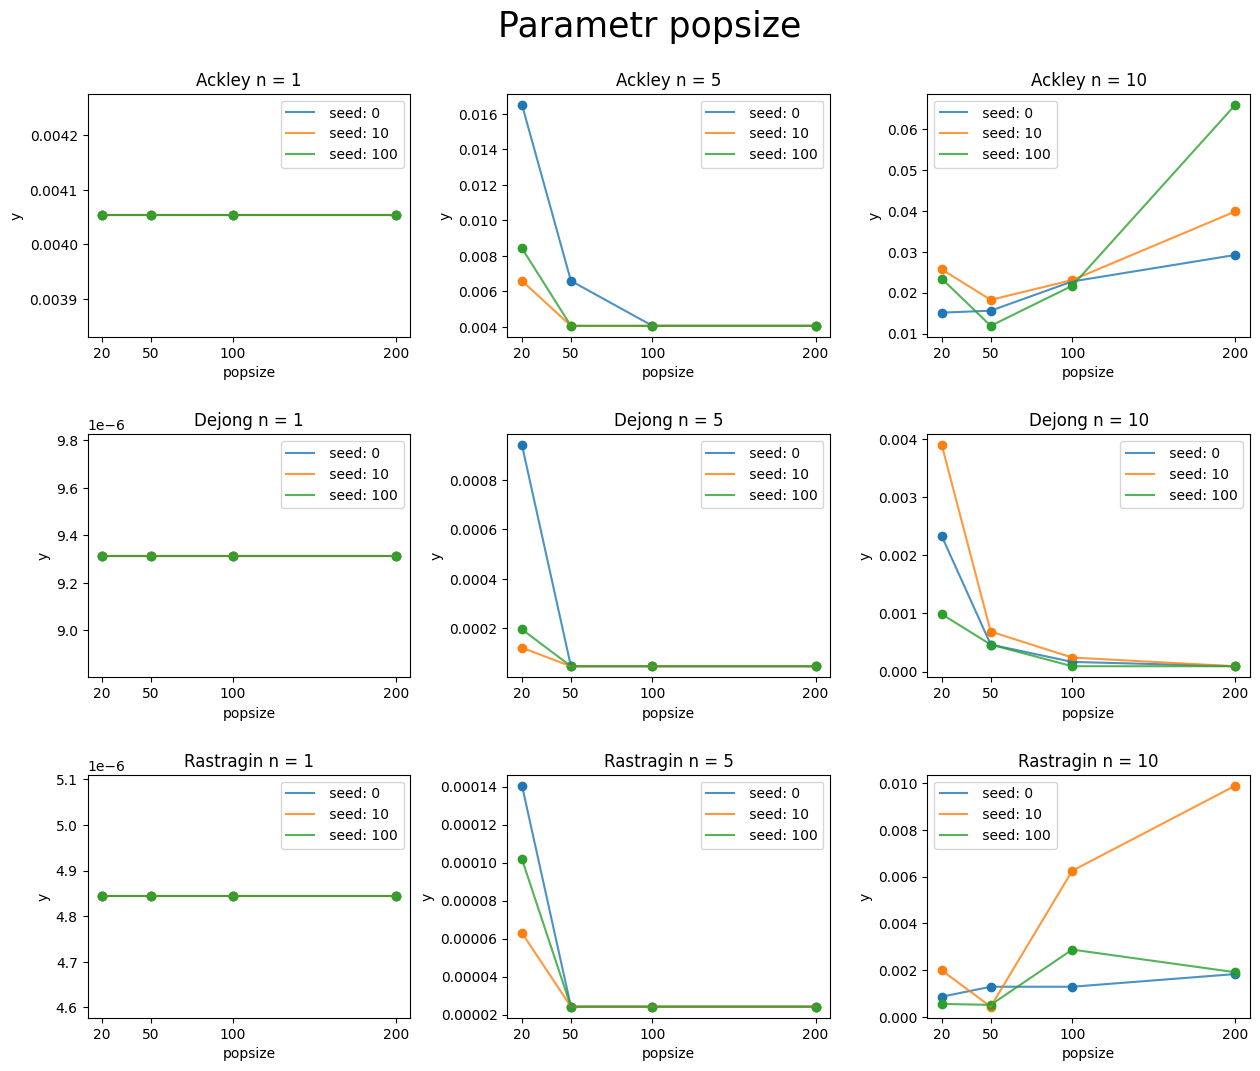

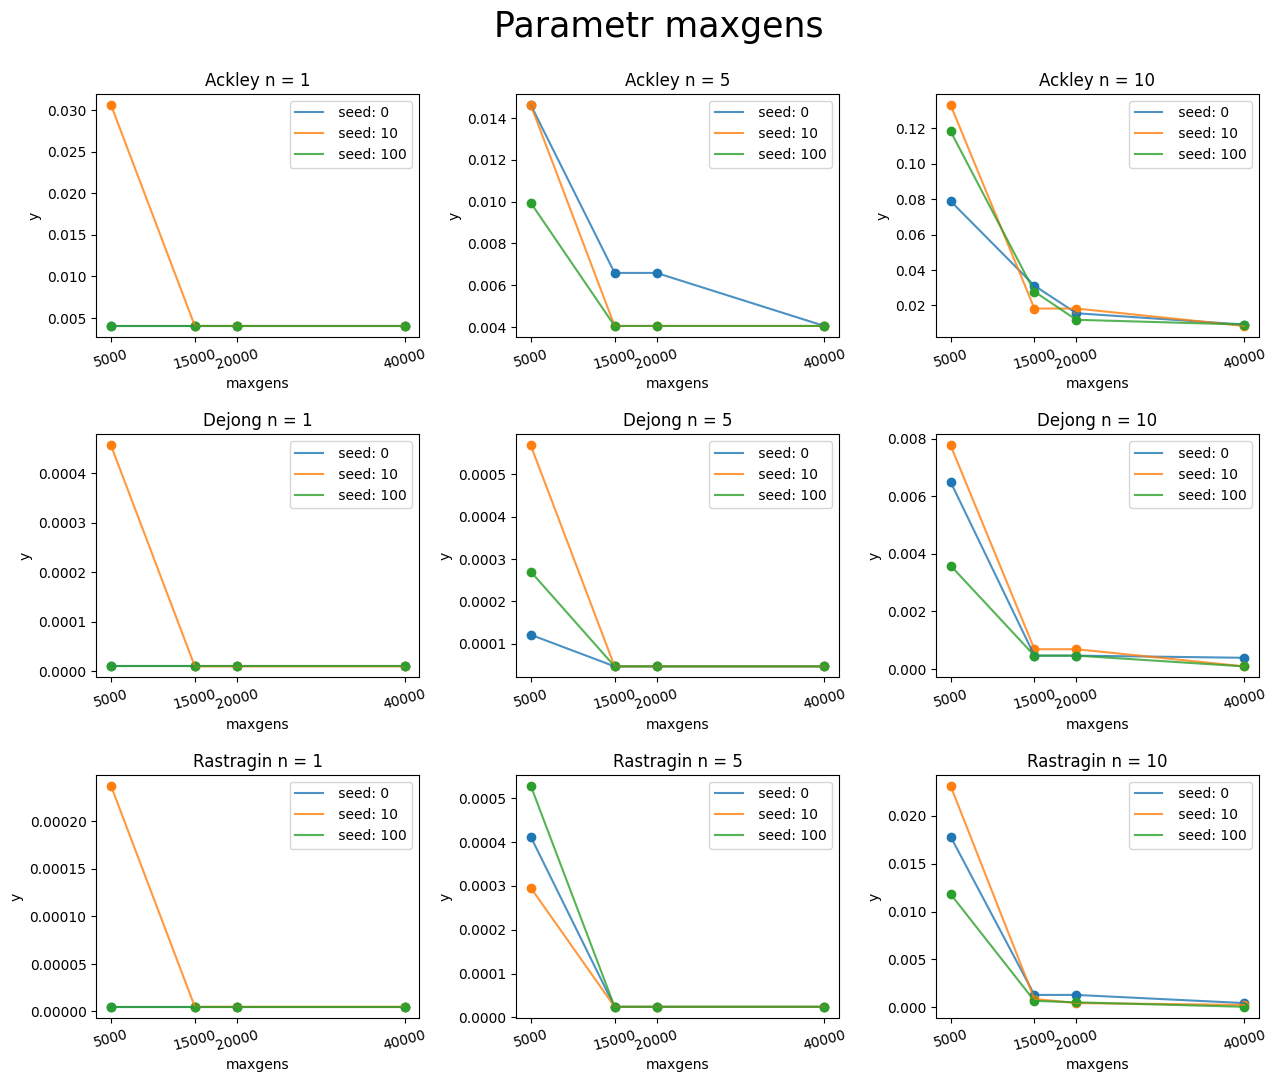

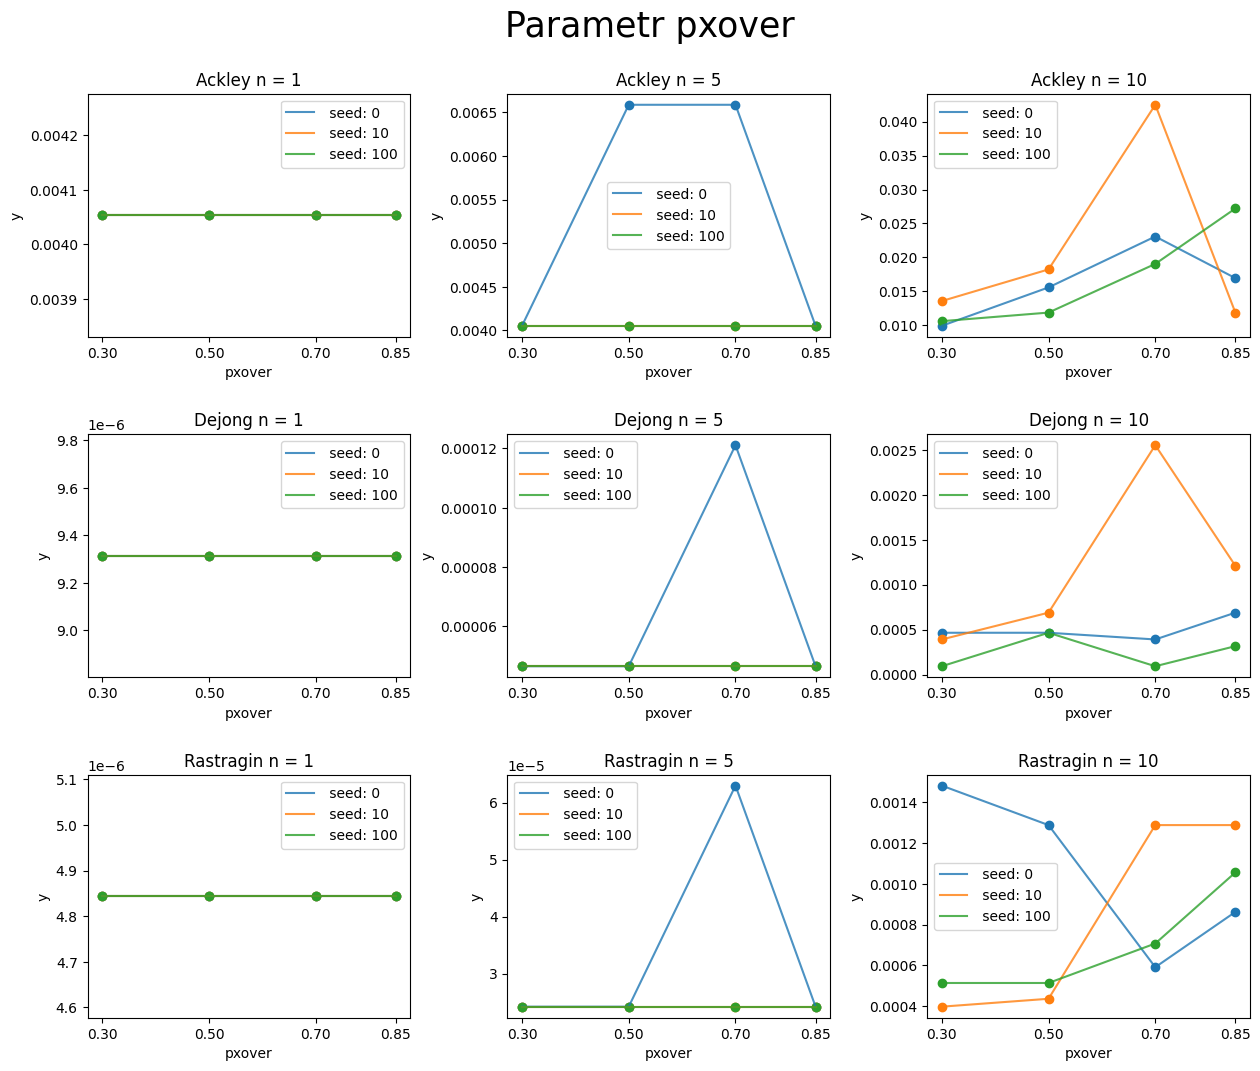

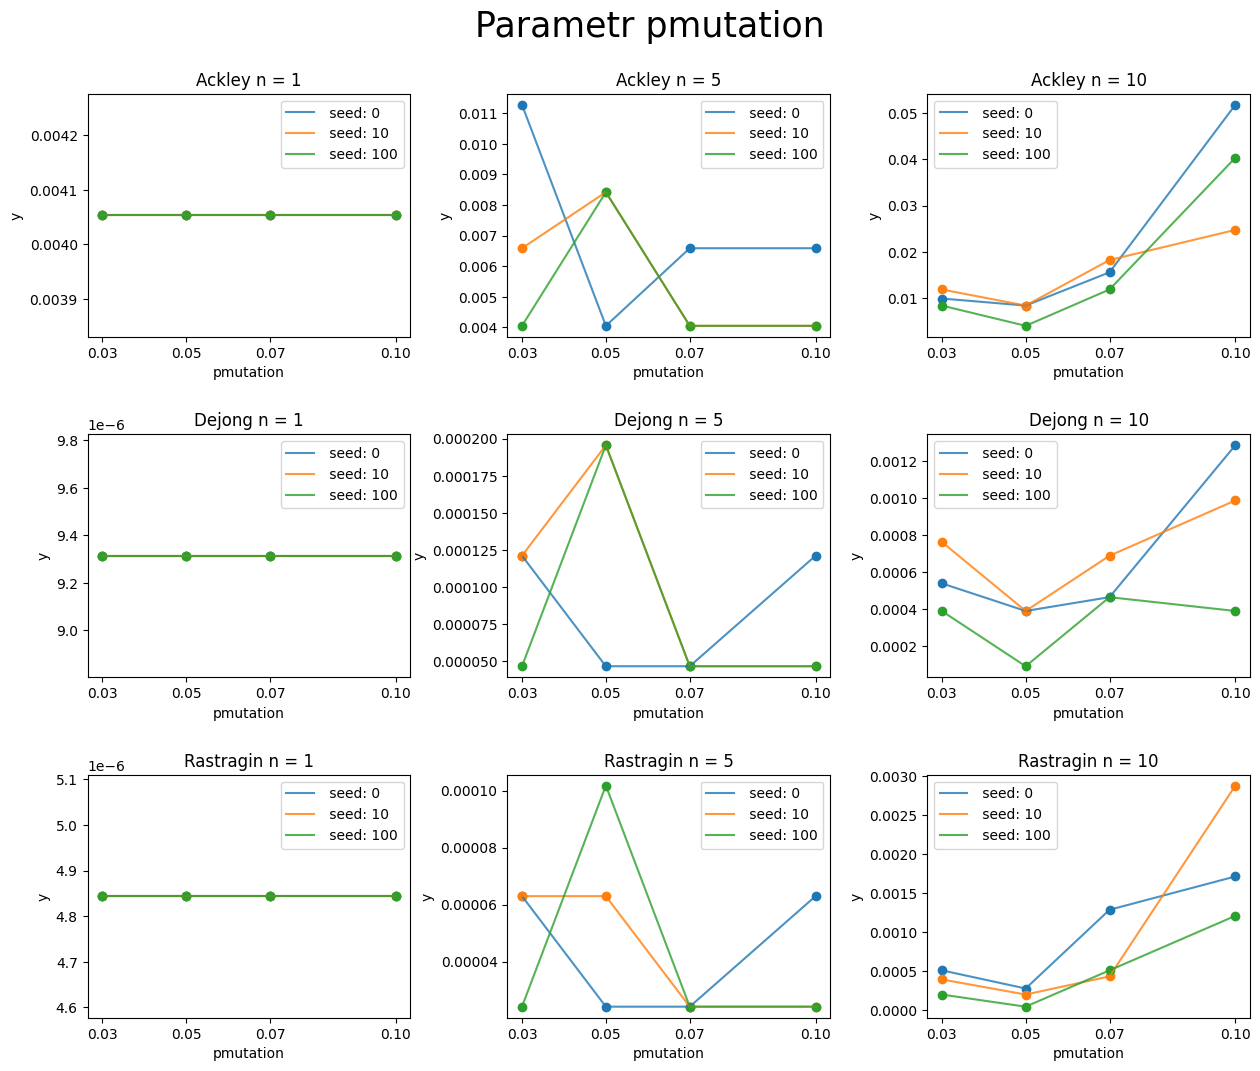

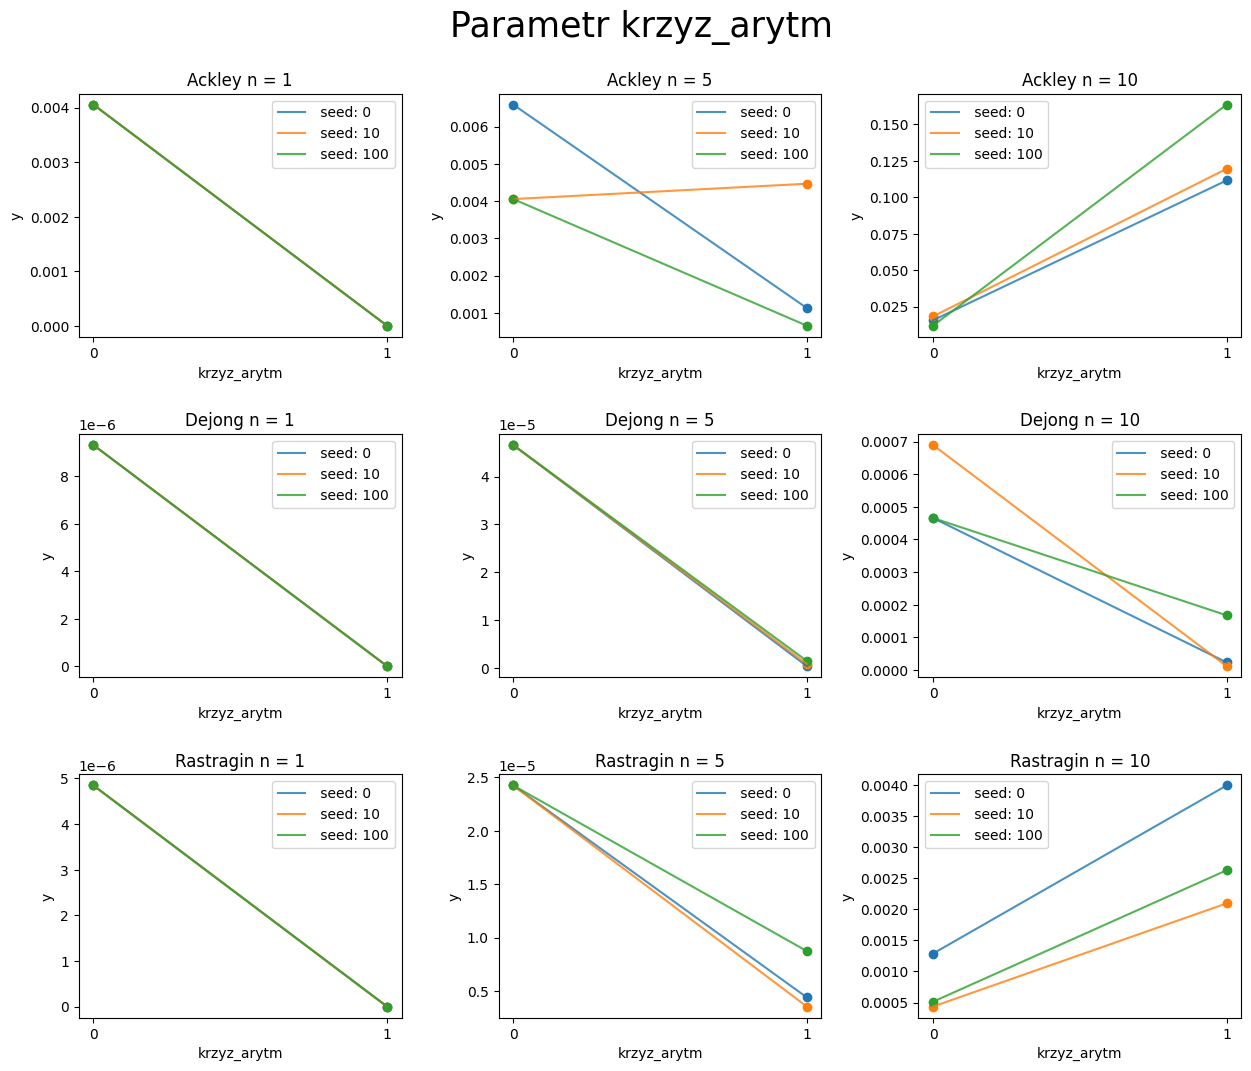

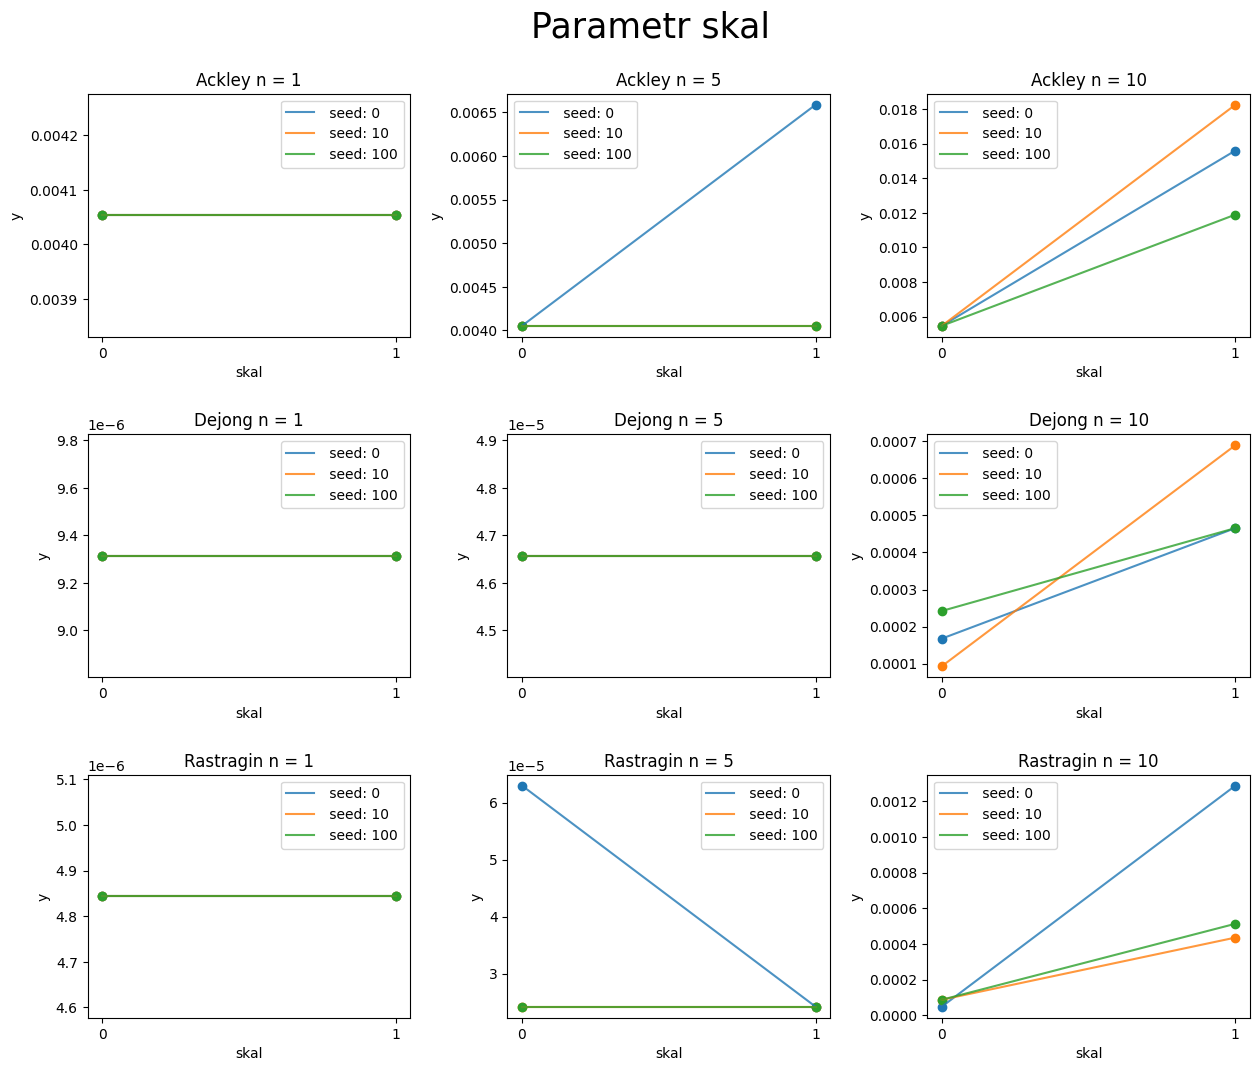

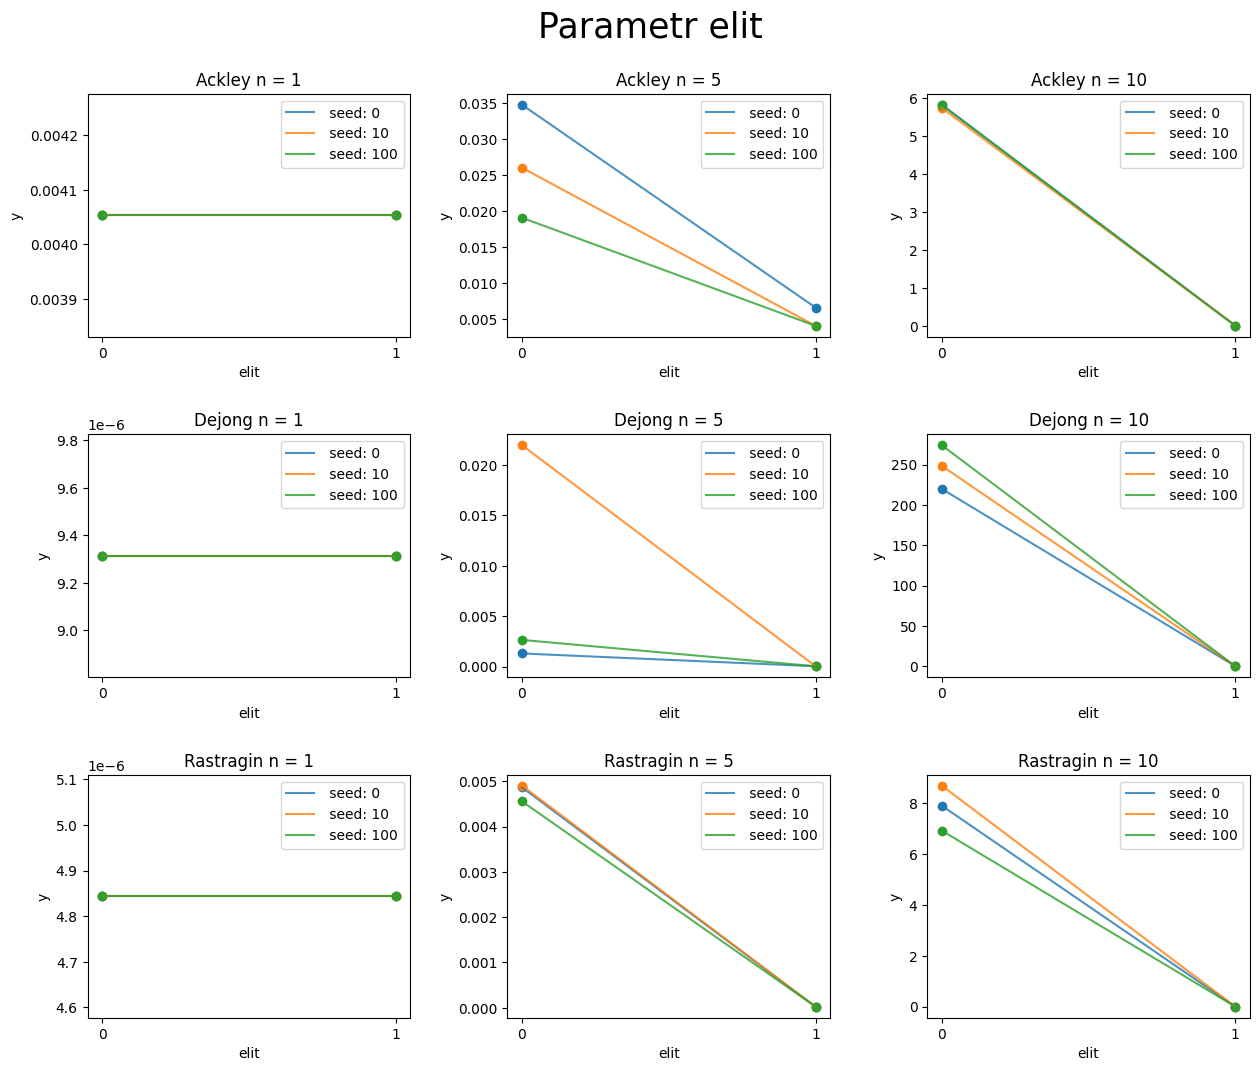

In [7]:
for param in ['popsize','maxgens','pxover','pmutation','krzyz_arytm','skal','elit']:
    f=plot_1(df,param, y = 'y', show=False)

C:\Users\Filip\AppData\Local\Temp\ipykernel_4216\85322954.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_4216\85322954.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_4216\85322954.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\Filip\AppData\Local\Temp\ipykernel_4216\85322954.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\U

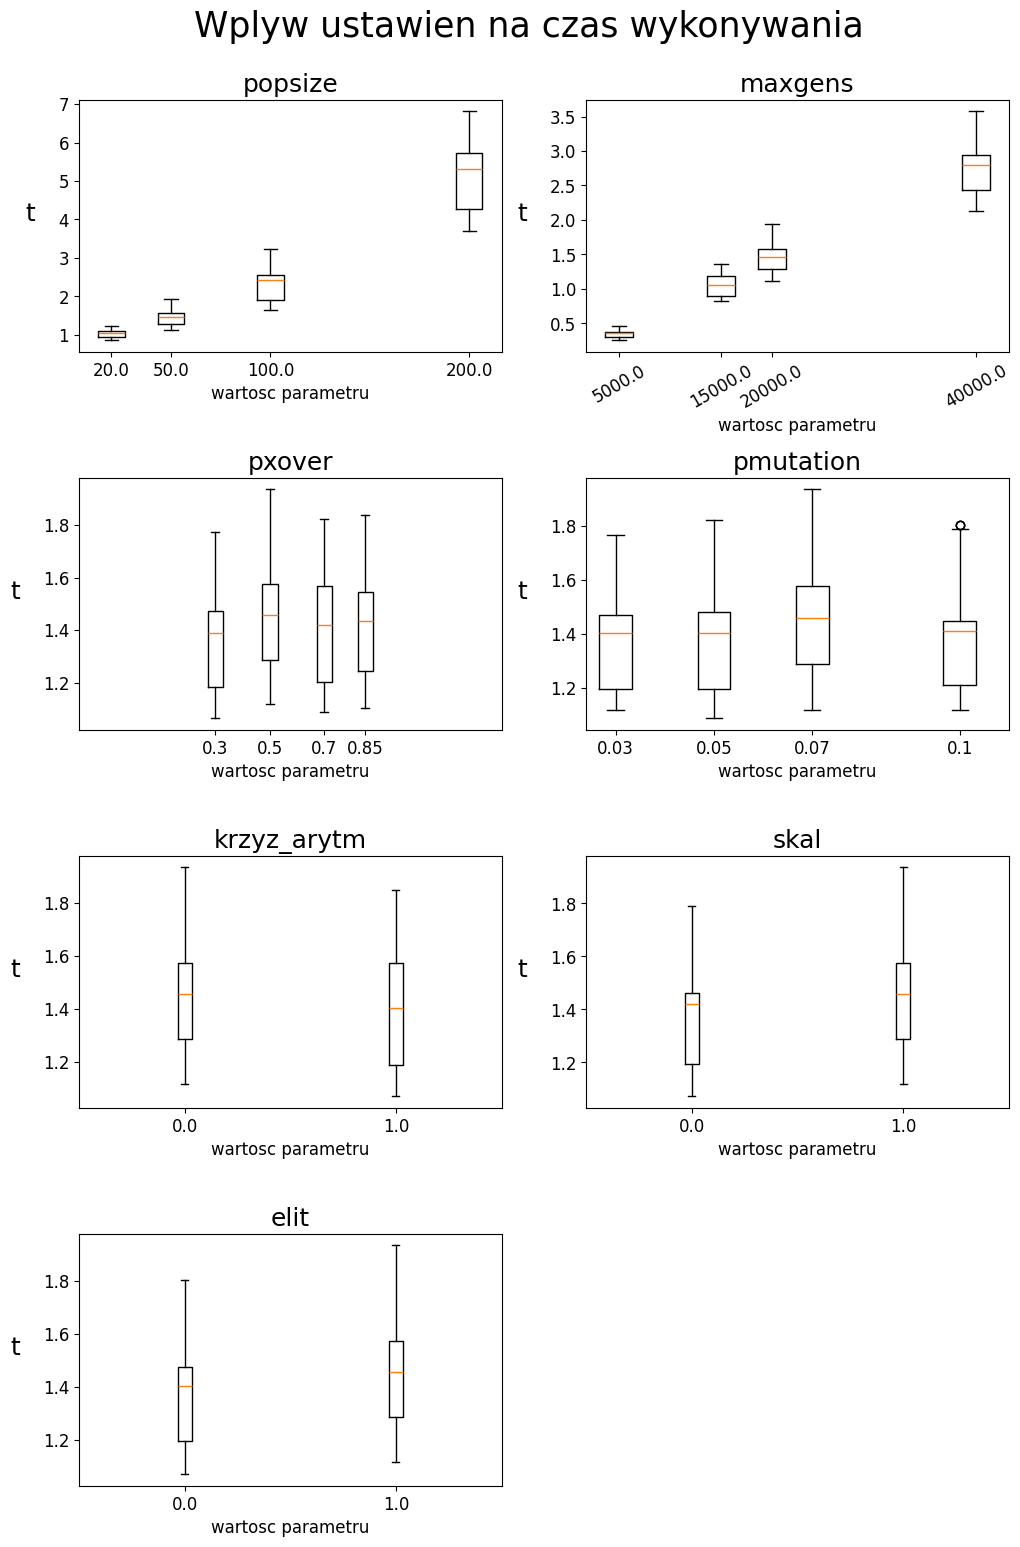

In [43]:
def plot_single(df,param,ax, y='t'):
    paramdf = df[df[param]!=dflt[param].values[0]].sort_values(by=param)
    dfltdf = df.loc[[0,1,2]]
    tdf = pd.concat([paramdf, dfltdf])
    w = max(np.unique(tdf[param]))/15
    for val in np.unique(tdf[param]):
        tdf2 = tdf[tdf[param] == val]
        ax.boxplot(tdf2[y], positions=[val], widths=[w])
    #ax.set_xlabel(param, fontsize=18)
    ax.set_title(f"{param}", fontdict={'fontsize':18})

    ax.set_xlabel("wartosc parametru", fontsize=12)
    ax.set_ylabel(y, labelpad=20, fontsize=18, rotation=0)
    if (param=='pmutation'):
        ax.set_xlim([min(tdf[param])*0.8, max(tdf[param])*1.1])
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

    if (param=='maxgens'):
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize=12)

y = 't'
fig, axs = plt.subplots(4,2, figsize=(12,18))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = -1
for param in ['popsize','maxgens','pxover','pmutation','krzyz_arytm','skal','elit']:
    i += 1
    axid1 = int(i/2)
    axid2 = i%2
    plot_single(df, param, axs[axid1, axid2],y)
axs[3,1].remove()
fig.suptitle("Wplyw ustawien na czas wykonywania", fontsize=25, y=0.93)
fig.savefig('./plots/time.png', bbox_inches='tight')

In [9]:
df = None
for fname in ['ackley','dejong','rastragin']:
    for n in [1, 5, 10]:
        filename = f"./CW 9 - EA_OPT/results/{fname}/report_EA_auto_{n}p.txt"
        tdf = load_file(filename, fname, n)
        if (type(df) == type(None)):
            df = tdf
        else:
            df = pd.concat([df, tdf])
df['g'] = [x[0] + str(x[1]) for x in zip(df['fname'], df['n'])]

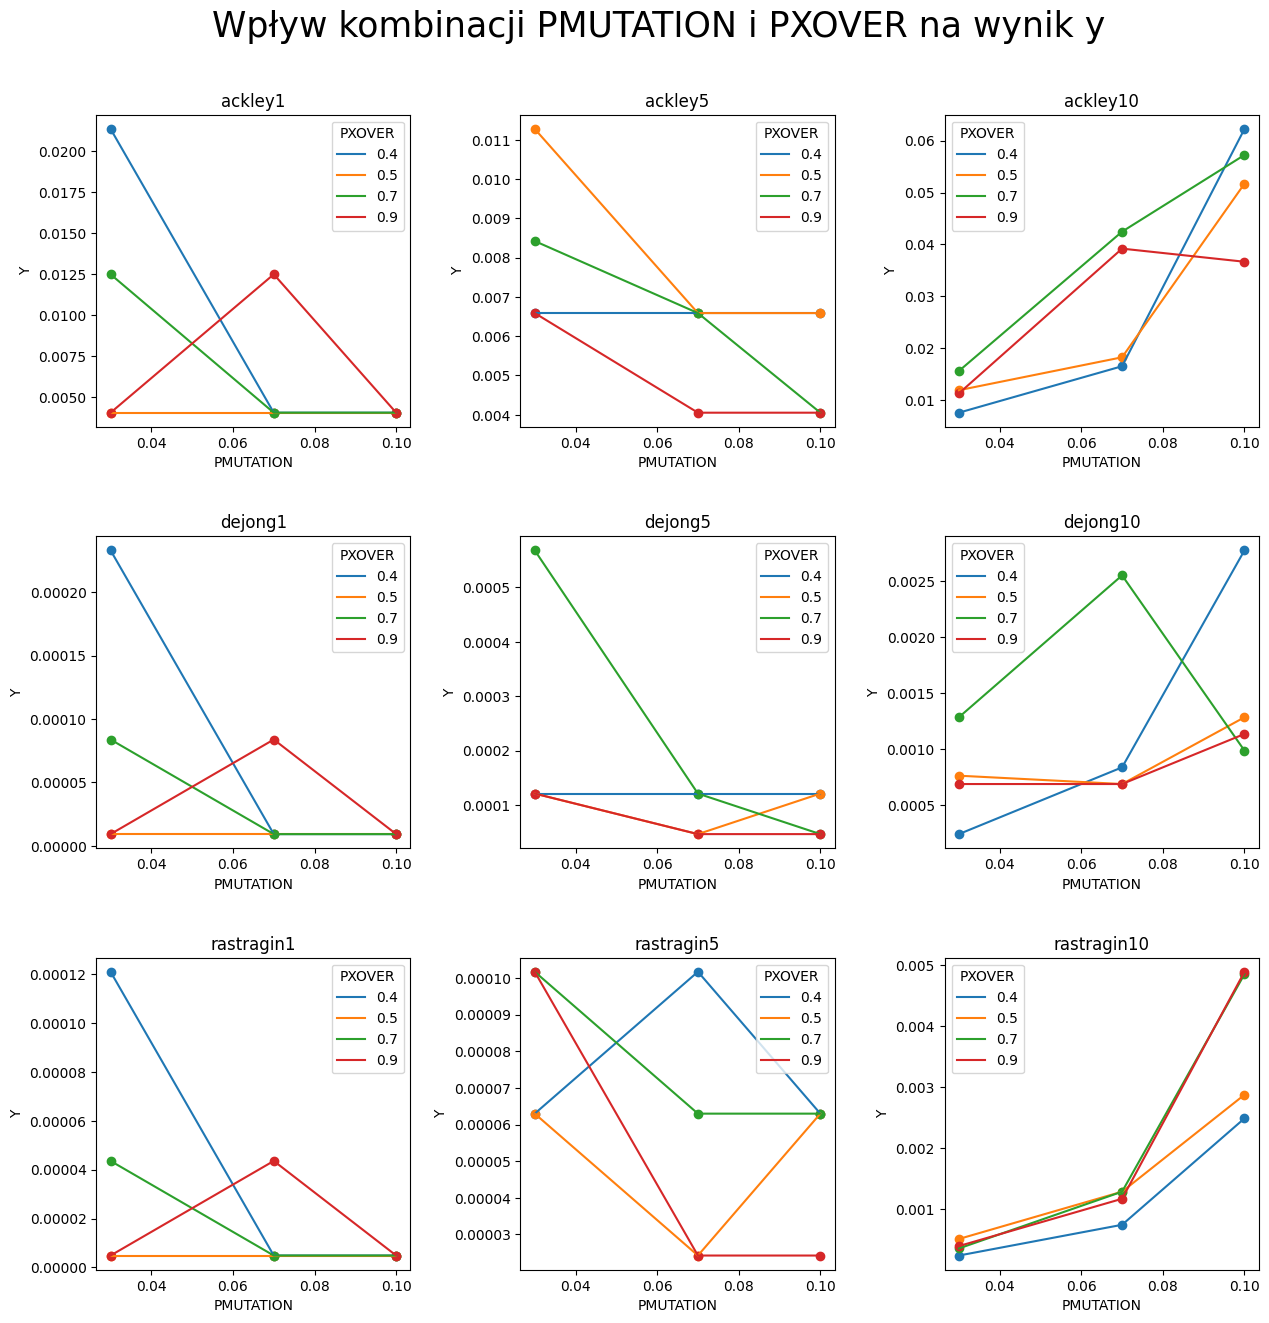

In [40]:
def pxpm_oneplot(df, g, ax):
    tdf = df[df['g']==g]
    for val in np.unique(tdf['pxover']):
        tdf2 = tdf[tdf['pxover']==val].sort_values(by='pmutation')
        xp = []
        yp = []
        for val2 in np.unique(tdf2['pmutation']):
            yval = tdf2[tdf2['pmutation']==val2]['y'].max()
            xp += [val2]
            yp += [yval]

        ax.plot(xp, yp, label=val)
        ax.scatter(xp, yp)
    ax.legend(title='PXOVER')
    ax.set_ylabel('Y')
    ax.set_xlabel('PMUTATION')
    ax.set_title(g)

g='dejong10'

fig, axs = plt.subplots(3,3, figsize=(15,15))
fig.subplots_adjust(hspace=0.35, wspace=0.35)
fig.suptitle("Wpływ kombinacji PMUTATION i PXOVER na wynik y", fontsize=25, y=0.95)
i = -1
for fname in ['ackley','dejong','rastragin']:
    for n in [1, 5, 10]:
        i += 1
        g = fname+str(n)
        ax = axs[int(i/3), i%3]
        pxpm_oneplot(df,g,ax)
fig.savefig("./plots/pxpm.png", bbox_inches='tight')



it       1999.000000
ybest       0.026605
sum              NaN
ycurr     203.089500
Name: 1999, dtype: float64


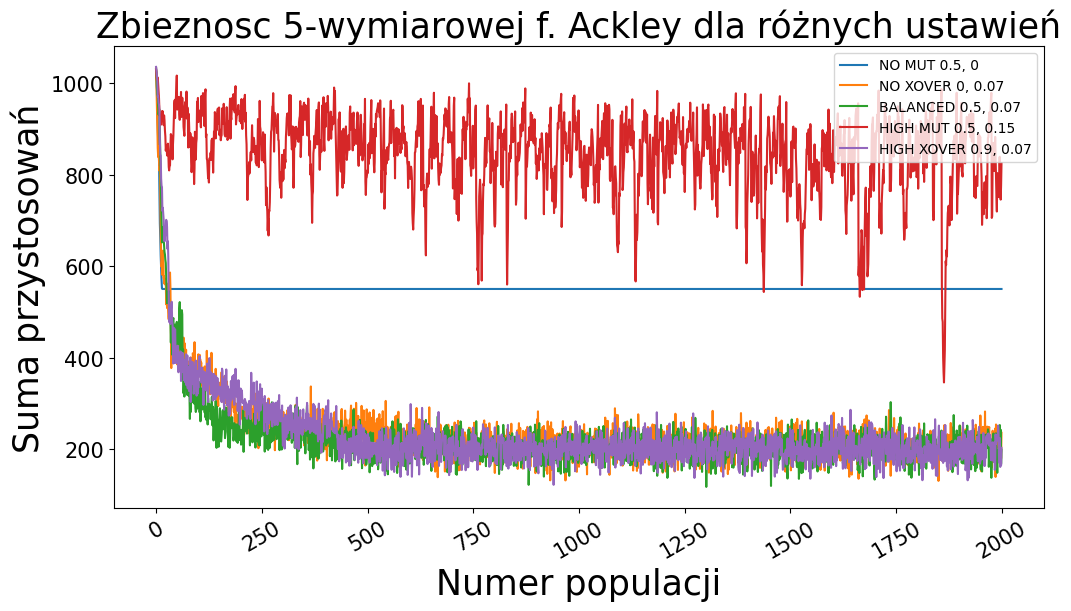

In [10]:
def init_df(n):
    columns = ['it','ybest','sum']
    return pd.DataFrame(columns=columns)
def proc_line(df, line, i=0):
    s = line.split(',')
    s.pop()
    #s = [float(x) for x in s]
    try:
        x = [s[0],s[1],s[2]]    
        return x
    except Exception as e:
        pass
def load_log(filename):
    with open(filename) as f:
        data = f.readlines()
        df = init_df(n)
        s = [proc_line(df,line, i) for i, line in enumerate(data)]
        
        df['it'] = [x[0] for x in s if x != None]
        df['ybest'] = [x[1] for x in s if x != None]
        df['ycurr'] = [x[2] for x in s if x != None]
        df.drop(df.tail(1).index,inplace=True)
        df = df.astype(float)
    return df


filename = "./CW 9 - EA_OPT/log.txt"
funcname = 'Ackley'
n=5
fig = plt.figure(figsize=(12,6))
step = 1
for logname,label in zip(['0mut','0xover','bal','hmut','hxover'],['NO MUT 0.5, 0','NO XOVER 0, 0.07','BALANCED 0.5, 0.07', 'HIGH MUT 0.5, 0.15','HIGH XOVER 0.9, 0.07']):
    #plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ybest'],label='ybest')
    df = load_log(f'./CW 9 - EA_OPT/results/logs/log_{logname}.txt')
    plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ycurr'],label=label)
    plt.title(f'Zbieznosc {n}-wymiarowej f. {funcname} dla różnych ustawień', fontsize = 25)
    plt.xlabel('Numer populacji', fontsize=25)
    plt.ylabel('Suma przystosowań', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)

plt.legend()
print(df.loc[len(df)-1])
fig.savefig('./plots/pxpm2.png',bbox_inches='tight')
plt.show()